#### NAMA : M. JOVAN PUTRA ARISANDI
#### NIM : 09011282328026
#### KELAS : SK3B

# Laporan Analisis Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

**DATASET** : Data set yang digunakan adalah heart_disease_uci.csv yang memuat informasi tentang penyakit jantung. Dataset ini memiliki bagian variabel numerik dan berbagai kategori lainnya

In [2]:
df = pd.read_csv('C:/Users/jovan/OneDrive/Documents/Bahan Tugas Semester 3/Bahan Data Mining/heart_disease_uci.csv')

**EKSPLORASI AWAL** : 
- Menampilkan 5 baris pertama dan terakhir dari dataset
- Melihat informasi tentang dataset (Tipe data, jumlah entri dan jumlah kolom)
- Mengecek nilai missing dan outliers

In [3]:
print('Menampilkan 5 beris pertama dari dataset')
display(df.head())

print('\nMenampilkan 5 baris terakhir dari dataset')
display(df.tail())

print ('\nMenampilkan tipe data')
display(df.info())

jumlah_baris,jumlah_kolom = df.shape
print(f"Jumlah entri (Baris): {jumlah_baris}")
print(f"Jumlah kolom : {jumlah_kolom}")

Menampilkan 5 beris pertama dari dataset


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Menampilkan 5 baris terakhir dari dataset


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1



Menampilkan tipe data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


None

Jumlah entri (Baris): 920
Jumlah kolom : 16


In [4]:
print('Jumlah nilai missing setiap kolom')
print(df.isnull().sum())

print('\nTotal nilai missing dalam dataset')
print(df.isnull().sum().sum())

print('\nBaris yang mengandung nilai missing')
print(df[df.isnull().any(axis=1)])

Jumlah nilai missing setiap kolom
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Total nilai missing dalam dataset
1759

Baris yang mengandung nilai missing
      id  age     sex        dataset               cp  trestbps   chol    fbs  \
87    88   53  Female      Cleveland      non-anginal     128.0  216.0  False   
166  167   52    Male      Cleveland      non-anginal     138.0  223.0  False   
192  193   43    Male      Cleveland     asymptomatic     132.0  247.0   True   
266  267   52    Male      Cleveland     asymptomatic     128.0  204.0   True   
287  288   58    Male      Cleveland  atypical angina     125.0  220.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic

**STATISTIK DESKRIPTIF**
- Menghitung dan menampilkan Mean, Median, Mode, Standar Deviasi, Varianse, Skewness, dan Kurtosis untuk kolom numerik
- Hitung korelasi antar variabel numerik

In [5]:
df_numeric = df.select_dtypes(include='number')

for column in df_numeric.columns:
    print(f"\nStatistik untuk kolom '{column}':")
    
    mean_val = df_numeric[column].mean()
    median_val = df_numeric[column].median()
    mode_val = df_numeric[column].mode()[0]
    std_dev = df_numeric[column].std()
    variance = df_numeric[column].var()
    skewness = skew(df_numeric[column])
    kurt = kurtosis(df_numeric[column])
    
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Standar Deviasi: {std_dev}")
    print(f"Variansi: {variance}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")


Statistik untuk kolom 'id':
Mean: 460.5
Median: 460.5
Mode: 1
Standar Deviasi: 265.72542219366215
Variansi: 70610.0
Skewness: 0.0
Kurtosis: -1.2000028355421026

Statistik untuk kolom 'age':
Mean: 53.51086956521739
Median: 54.0
Mode: 54
Standar Deviasi: 9.424685209576857
Variansi: 88.82469129961679
Skewness: -0.19567416156265732
Kurtosis: -0.387366500445804

Statistik untuk kolom 'trestbps':
Mean: 132.13240418118468
Median: 130.0
Mode: 120.0
Standar Deviasi: 19.066069518587476
Variansi: 363.5150068876104
Skewness: nan
Kurtosis: nan

Statistik untuk kolom 'chol':
Mean: 199.13033707865168
Median: 223.0
Mode: 0.0
Standar Deviasi: 110.7808103532305
Variansi: 12272.387942518422
Skewness: nan
Kurtosis: nan

Statistik untuk kolom 'thalch':
Mean: 137.5456647398844
Median: 140.0
Mode: 150.0
Standar Deviasi: 25.926276492797594
Variansi: 672.1718127809892
Skewness: nan
Kurtosis: nan

Statistik untuk kolom 'oldpeak':
Mean: 0.8787878787878788
Median: 0.5
Mode: 0.0
Standar Deviasi: 1.091226248346529

Korelasi anter variabelnumerik
                id       age  trestbps      chol    thalch   oldpeak  \
id        1.000000  0.239301  0.052924 -0.376936 -0.466427  0.049930   
age       0.239301  1.000000  0.244253 -0.086234 -0.365778  0.258243   
trestbps  0.052924  0.244253  1.000000  0.092853 -0.104899  0.161908   
chol     -0.376936 -0.086234  0.092853  1.000000  0.236121  0.047734   
thalch   -0.466427 -0.365778 -0.104899  0.236121  1.000000 -0.151174   
oldpeak   0.049930  0.258243  0.161908  0.047734 -0.151174  1.000000   
ca        0.061433  0.370416  0.093705  0.051606 -0.264094  0.281817   
num       0.273552  0.339596  0.122291 -0.231547 -0.366265  0.443084   

                ca       num  
id        0.061433  0.273552  
age       0.370416  0.339596  
trestbps  0.093705  0.122291  
chol      0.051606 -0.231547  
thalch   -0.264094 -0.366265  
oldpeak   0.281817  0.443084  
ca        1.000000  0.516216  
num       0.516216  1.000000  


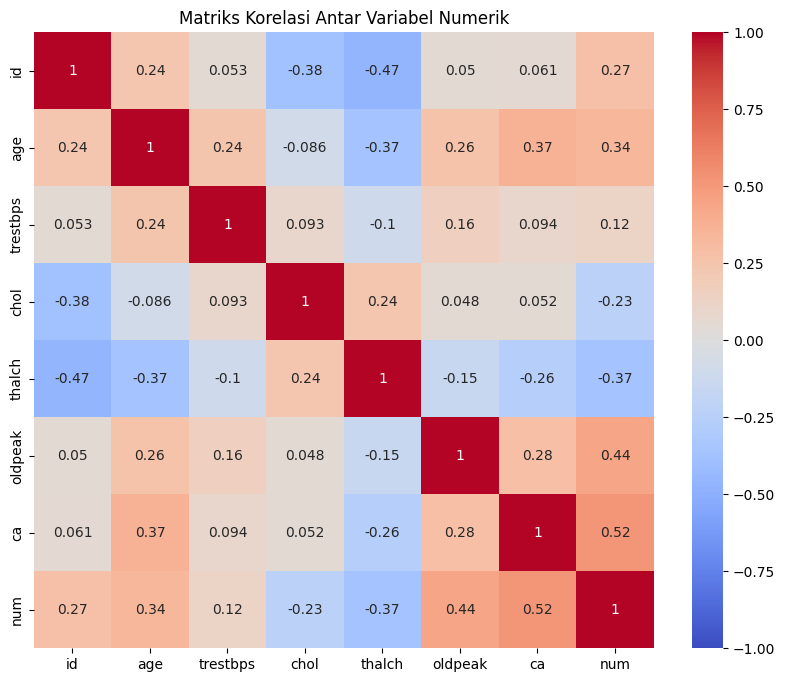

In [6]:
df_numerik = df.select_dtypes(include=['float64', 'int64'])
korelasi_numerik = df_numerik.corr()

print('Korelasi anter variabelnumerik')
print(korelasi_numerik)

plt.figure(figsize=(10, 8))
sns.heatmap(korelasi_numerik, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

**VISUALISASI DATA**
- Membuat Histogram dan Box Plot untuk setiap variabel numerik
- buat scatter plot untuk pasangan variabel yang memiliki korelasi tinggi

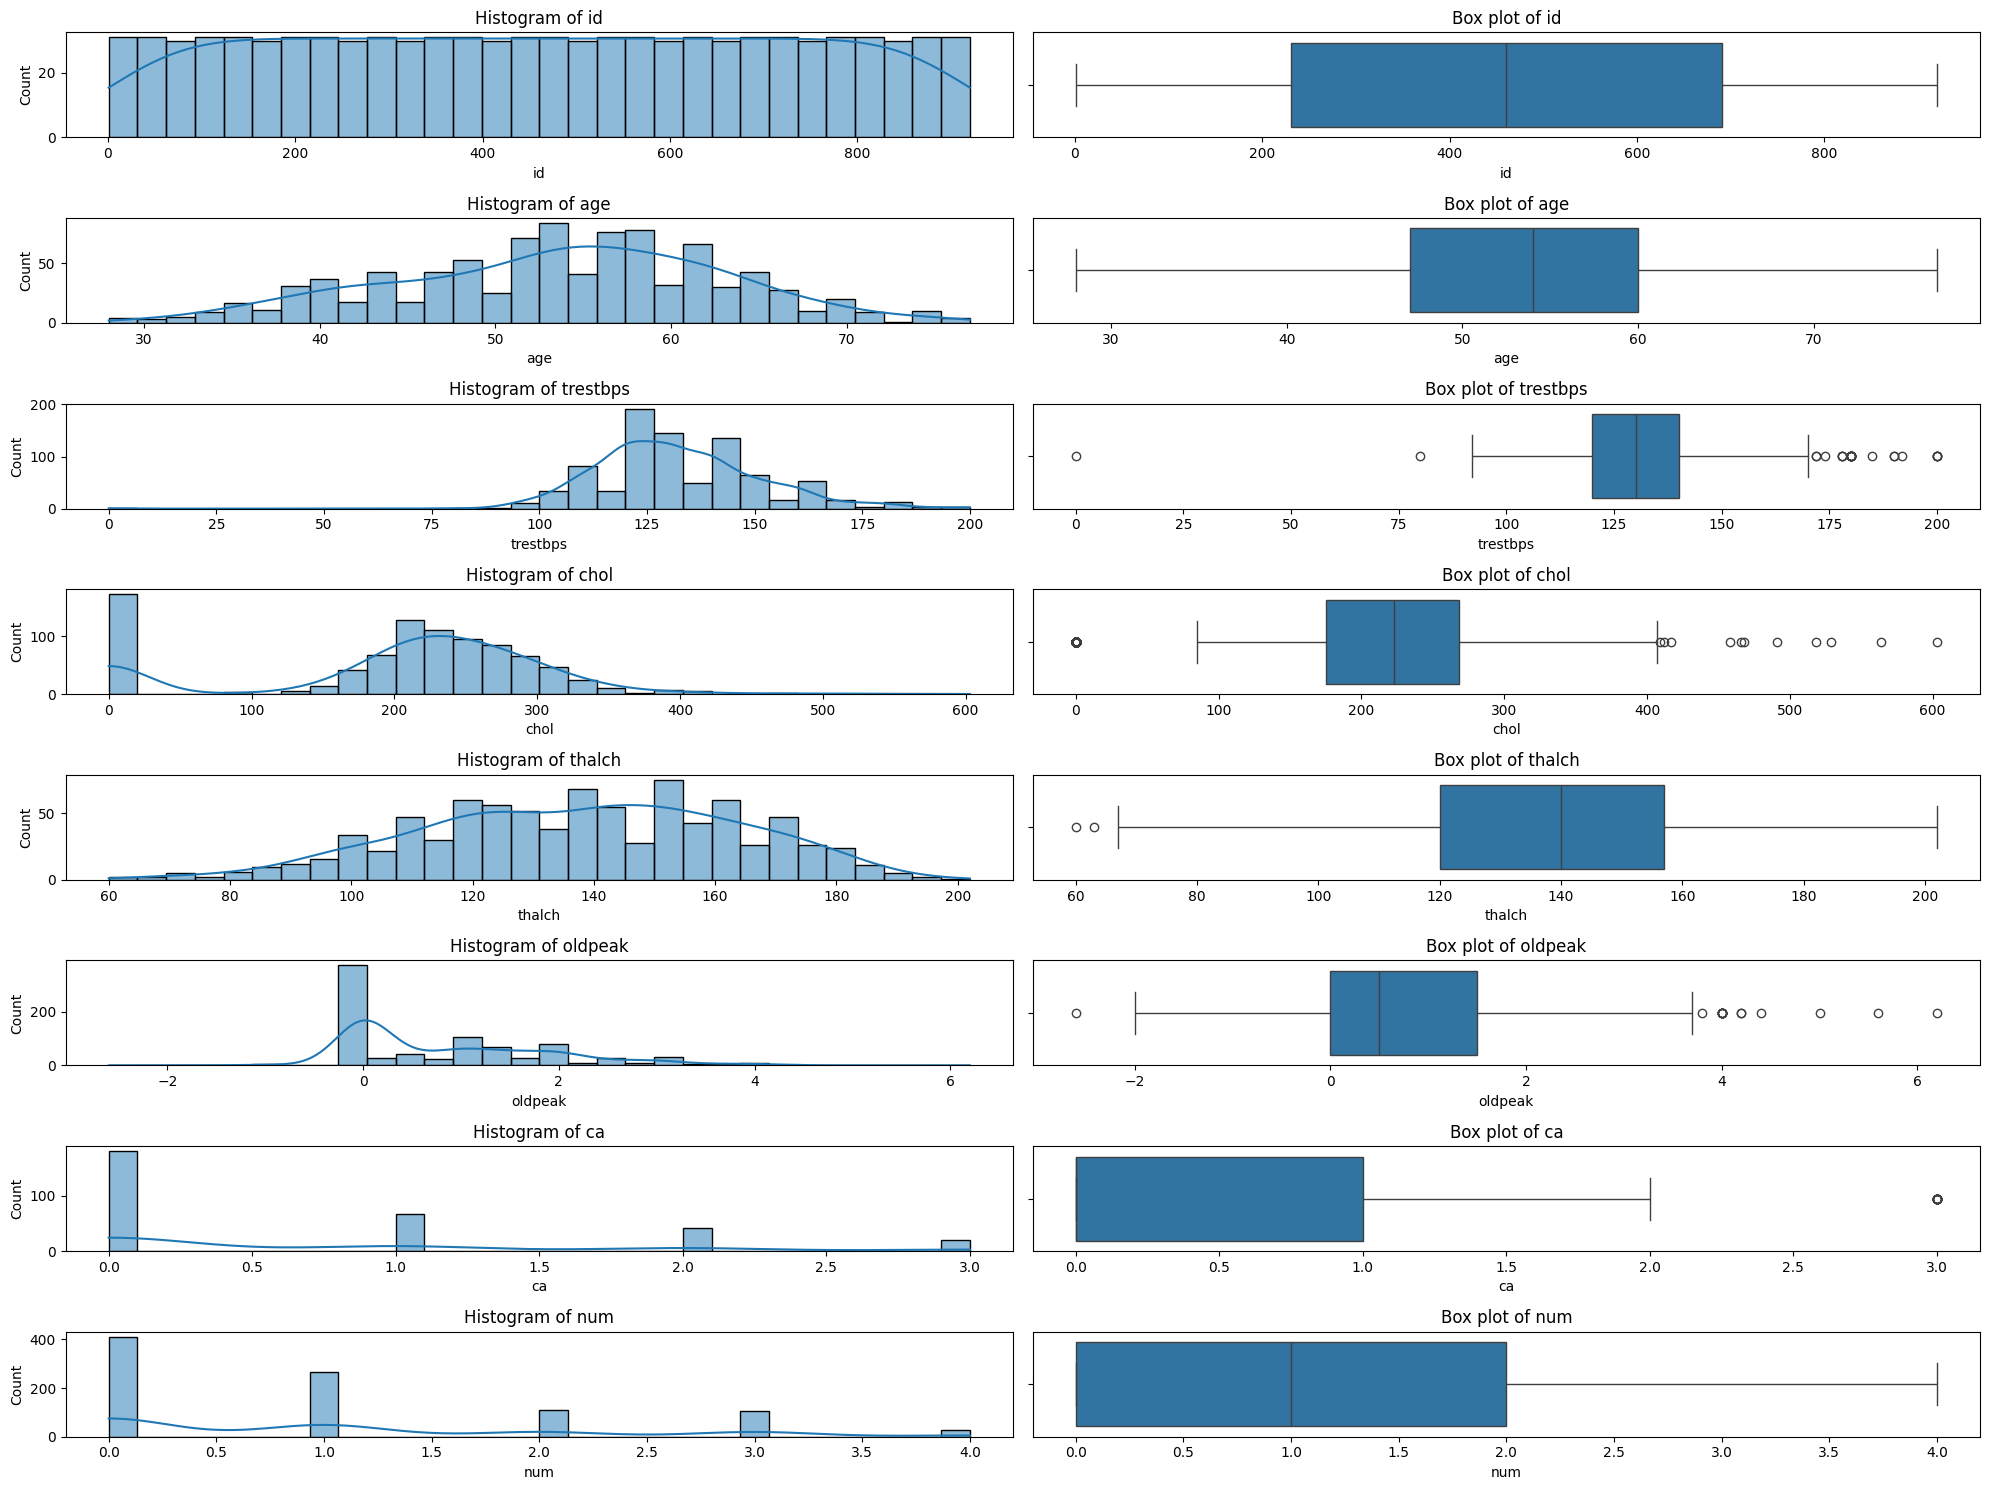

In [7]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(df_numerik.columns):
    plt.subplot(len(df_numerik.columns), 2, 2*i+1)
    sns.histplot(df_numerik[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(len(df_numerik.columns), 2, 2*i+2)
    sns.boxplot(x=df_numerik[col])
    plt.title(f'Box plot of {col}')
    
plt.tight_layout()
plt.show()

In [8]:
threshold = 0.7

pasangan_korelasi_tinggi = []

for i in range(len(korelasi_numerik.columns)):
    for j in range(i):
        if abs(korelasi_numerik.iloc[i, j]) > threshold:
            pasangan_korelasi_tinggi.append((korelasi_numerik.columns[i], korelasi_numerik.columns[j]))

if pasangan_korelasi_tinggi:
    plt.figure(figsize=(10, 8))

    for i, (var1, var2) in enumerate(pasangan_korelasi_tinggi):
        plt.subplot(len(pasangan_korelasi_tinggi), 1, i+1)
        sns.scatterplot(x=df_numerik[var1], y=df_numerik[var2])
        plt.title(f'Scatter Plot of {var1} vs {var2}')
    
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada pasangan variabel dengan korelasi tinggi.")

Tidak ada pasangan variabel dengan korelasi tinggi.


#### LAPORAN AKHIR
Dalam analisis ini saya telah melakukan eksplorasi awal, menghitung statistik deskriptif, memvisualisasikan data dengan histogram, box plot, dan scatter plot untuk pasangan variabel dengan korelasi tinggi. Diketahui pada data missing kolom dengan nilai missing tertinggi terdapat pada kolom 'ca' dengan 611 total nilai hilang (missing) dan Beberapa baris yang mengandung nilai missing menunjukkan data yang tidak lengkap di kolom seperti trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, untuk total seluruh data hilang yang ada dalam dataset berjumlah 1759 data, dan juga untuk gambar heatmap matriks korelasi antar variabel numerik menunjukkan adanya konsistensi warna merah dari sudut kiri atas menuju ke sudut kanan bawah yang menandakan adanya korelasi yang sangat kuat antara variabel yang terletak pada sumbu baris dan kolom tersebut.
